In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_bordeaux_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('bordeaux')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/bordeaux_{date}.csv',index=False)
get_listings_bordeaux_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_bordeaux = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_bordeaux)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(bordeaux_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 9424 AirBnb listings.


In [4]:
bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2020-12.csv')
bordeaux_raw_df_12_12_2020.shape


(10562, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for bordeaux
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_bordeaux = glob.glob('bordeaux/**.csv')
files_bordeaux

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['bordeaux/Bordeaux_2021-08.csv',
 'bordeaux/Bordeaux_2021-09.csv',
 'bordeaux/Bordeaux_2020-12.csv',
 'bordeaux/Bordeaux_2021-10.csv',
 'bordeaux/Bordeaux_2021-04.csv',
 'bordeaux/Bordeaux_2021-07.csv',
 'bordeaux/Bordeaux_2021-06.csv',
 'bordeaux/Bordeaux_2021-02.csv',
 'bordeaux/Bordeaux_2021-03.csv',
 'bordeaux/Bordeaux_2021-01.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(bordeaux_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_12_12_2020['price'].mean(),2)}.")

bordeaux_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(bordeaux_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_1_9_2021['price'].mean(),2)}.")

bordeaux_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(bordeaux_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_2_8_2021['price'].mean(),2)}.")

bordeaux_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(bordeaux_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_3_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(bordeaux_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_4_9_2021['price'].mean(),2)}.")

#bordeaux_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(bordeaux_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_5_19_2021['price'].mean(),2)}.")

bordeaux_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(bordeaux_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_6_3_2021['price'].mean(),2)}.")

bordeaux_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(bordeaux_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_7_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(bordeaux_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_8_6_2021['price'].mean(),2)}.")

bordeaux_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(bordeaux_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_9_7_2021['price'].mean(),2)}.")

bordeaux_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(bordeaux_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_10_6_2021['price'].mean(),2)}.")

#bordeaux_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/bordeaux_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(bordeaux_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 10562 AirBnb listings; the avg price is €89.18.
The 1_9_2021 dataset contains 10615 AirBnb listings; the avg price is €87.85.
The 2_8_2021 dataset contains 10590 AirBnb listings; the avg price is €89.51.
The 3_4_2021 dataset contains 10466 AirBnb listings; the avg price is €89.95.
The 4_9_2021 dataset contains 10567 AirBnb listings; the avg price is €91.56.
The 6_3_2021 dataset contains 10496 AirBnb listings; the avg price is €94.35.
The 7_4_2021 dataset contains 10616 AirBnb listings; the avg price is €95.36.
The 8_6_2021 dataset contains 9663 AirBnb listings; the avg price is €98.91.
The 9_7_2021 dataset contains 9440 AirBnb listings; the avg price is €96.77.
The 10_6_2021 dataset contains 9424 AirBnb listings; the avg price is €96.95.


In [8]:
df_list_bordeaux = [bordeaux_raw_df_12_12_2020, bordeaux_raw_df_1_9_2021, bordeaux_raw_df_2_8_2021,
           bordeaux_raw_df_3_4_2021, bordeaux_raw_df_4_9_2021, bordeaux_raw_df_6_3_2021, bordeaux_raw_df_7_4_2021,
           bordeaux_raw_df_8_6_2021, bordeaux_raw_df_9_7_2021, bordeaux_raw_df_10_6_2021]

dates_bordeaux = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_bordeaux = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_bordeaux = []

def airbnb_parse_bordeaux(df_list, files):
    for file in files_bordeaux:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_{file}.csv")
        print(f"The {file} bordeaux dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_bordeaux(df_list, dates):
    for file in files_bordeaux:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_bordeaux.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_bordeaux)

bordeaux_parse = airbnb_parse_bordeaux(df_list_bordeaux, files_bordeaux)


The 2020-12 bordeaux dataset contains 10562 AirBnb listings -- the avg price is €89.18.
The 2021-01 bordeaux dataset contains 10615 AirBnb listings -- the avg price is €87.85.
The 2021-02 bordeaux dataset contains 10590 AirBnb listings -- the avg price is €89.51.
The 2021-03 bordeaux dataset contains 10466 AirBnb listings -- the avg price is €89.95.
The 2021-04 bordeaux dataset contains 10567 AirBnb listings -- the avg price is €91.56.
The 2021-06 bordeaux dataset contains 10496 AirBnb listings -- the avg price is €94.35.
The 2021-07 bordeaux dataset contains 10616 AirBnb listings -- the avg price is €95.36.
The 2021-08 bordeaux dataset contains 9663 AirBnb listings -- the avg price is €98.91.
The 2021-09 bordeaux dataset contains 9440 AirBnb listings -- the avg price is €96.77.
The 2021-10 bordeaux dataset contains 9424 AirBnb listings -- the avg price is €96.95.


In [9]:
bordeaux_summary = airbnb_to_frame_bordeaux(df_list_bordeaux, files_bordeaux)
bordeaux_summary['Date of scrape'] = pd.to_datetime(bordeaux_summary['Date of scrape'])
bordeaux_summary['City'] = 'Bordeaux'

dfi.export(bordeaux_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/airbnb_bordeaux_summary.png")


In [10]:
master_df_bordeaux = pd.concat(df_list_bordeaux)
master_df_bordeaux_unique = master_df_bordeaux.drop_duplicates(subset='id')
master_df_bordeaux_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,28925,Grande maison centre ville Comme à la campagne,124398,Laurence,Bordeaux,Centre ville (Bordeaux),44.84910,-0.59350,Entire home/apt,350,2,2,2018-07-06,0.05,1,179,NaN,NaN
1,185534,L'Echoppe typique de Bordeaux - tout confort,890736,Aurore,Bordeaux,Saint Augustin - Tauzin - Alphonse Dupeux,44.83063,-0.59331,Entire home/apt,115,3,0,NaN,NaN,1,0,NaN,NaN
2,218103,B&B Apart.Suite / tropical garden,1127981,Luis,Bgles,Bgles,44.81418,-0.54842,Entire home/apt,110,2,39,2020-09-13,0.35,4,3,NaN,NaN
3,222887,"Bordeaux Terrace - spectacular view, fast Wifi",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83611,-0.56640,Entire home/apt,157,3,38,2019-11-11,0.35,4,259,NaN,NaN
4,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.84782,-0.58105,Entire home/apt,124,3,24,2020-03-08,0.31,4,316,NaN,NaN


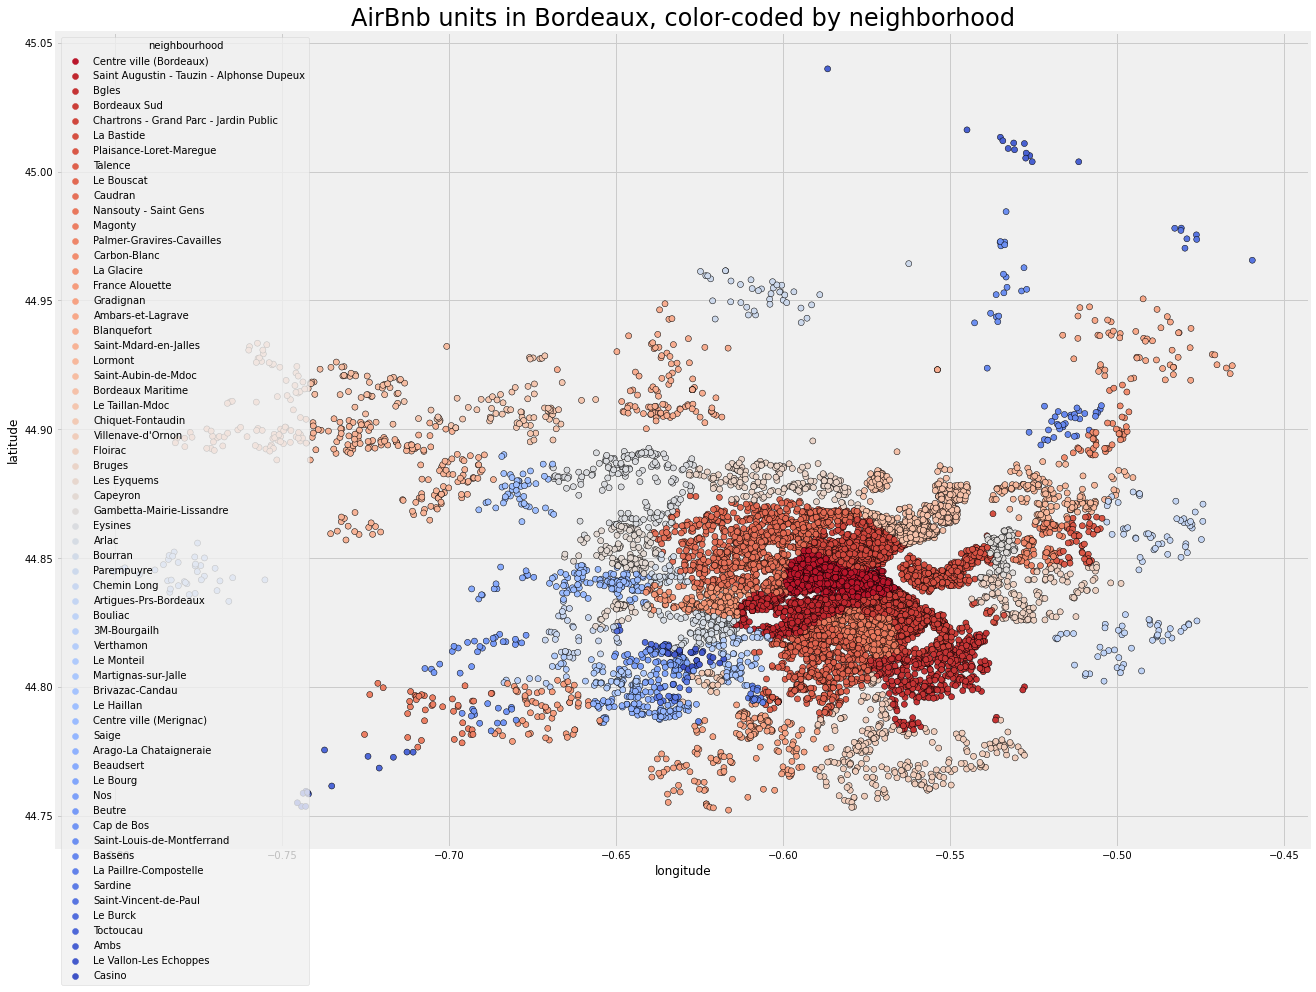

In [11]:
title = 'AirBnb units in Bordeaux, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_bordeaux_unique.longitude, master_df_bordeaux_unique.latitude, hue = master_df_bordeaux_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/airbnb_bordeaux_map.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([bordeaux_raw_df_10_6_2021,raw_df_bordeaux],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    4017
4    2328
6     966
3     554
1     515
5     381
0       2
Name: accommodates, dtype: int64

## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  37.52947396139267
Coefficients:  [ 13.76045893  34.88927767  -4.98503907   0.36295149   1.437974
  -2.83491572 -10.59902895  23.60886585 -21.78500306]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


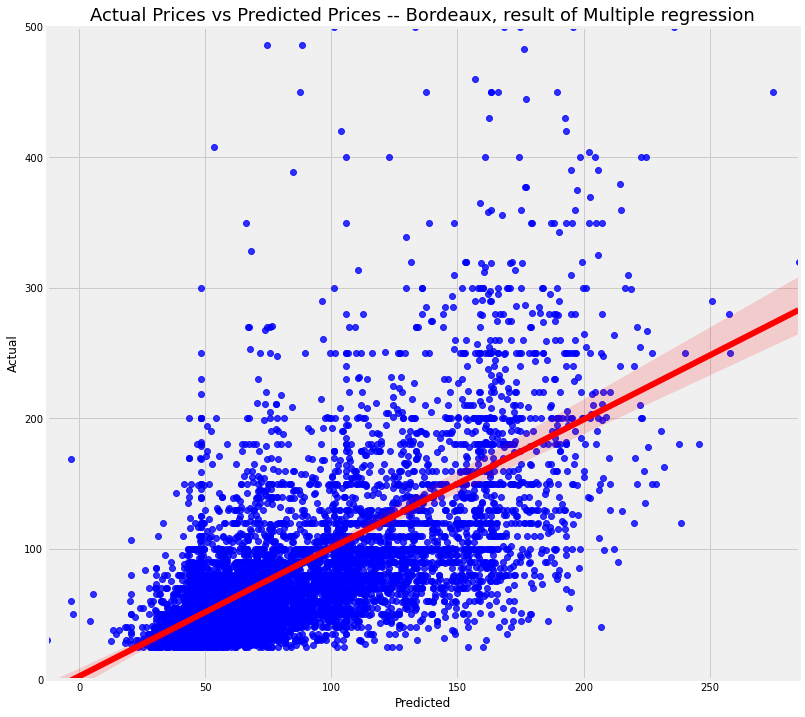

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Bordeaux, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/airbnb_bordeaux_multiple_regression.png')



In [19]:
df_result.shape

(7452, 3)

## The most mispriced [undervalued]

In [20]:
bordeaux_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
bordeaux_mispriced['%'] = (bordeaux_mispriced['Actual']/ bordeaux_mispriced['Predicted'] -1) *100
bordeaux_mispriced_perc = bordeaux_mispriced.sort_values(by=['%'], ascending=True)
bordeaux_mispriced_perc_plot = bordeaux_mispriced_perc.loc[(bordeaux_mispriced_perc['Predicted']>=1) & (bordeaux_mispriced_perc['Diff']>= 1)]
bordeaux_mispriced_perc_plot = bordeaux_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
bordeaux_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
7125,25,160.308931,135.308931,-84.405111
3679,25,154.212178,129.212178,-83.788570
8267,30,161.327725,131.327725,-81.404312
2483,40,206.978810,166.978810,-80.674350
3449,25,126.905057,101.905057,-80.300233


In [21]:

bordeaux_mispriced_1 = raw_df_bordeaux.loc[raw_df_bordeaux.id==827]
bordeaux_mispriced_2 = raw_df_bordeaux.loc[raw_df_bordeaux.id==748]
bordeaux_mispriced_3 = raw_df_bordeaux.loc[raw_df_bordeaux.index==1308]
bordeaux_mispriced_4 = raw_df_bordeaux.loc[raw_df_bordeaux.index==1748]
bordeaux_mispriced_5 = raw_df_bordeaux.loc[raw_df_bordeaux.index==894]

In [22]:
id_array = [7125, 3679, 8267, 2483, 3449]

bordeaux_mispriced_query = raw_df_bordeaux.query('index in @id_array')
bordeaux_mispriced_query = bordeaux_mispriced_query.rename({'index': 'id'}, axis=1)
bordeaux_mispriced_query.shape
#bordeaux_mispriced_query.head(1)

(5, 74)

In [23]:
#bordeaux_mispriced_neg = raw_df_bordeaux.loc[raw_df_bordeaux.index==4119]
bordeaux_mispriced_perc_1 = raw_df_bordeaux.loc[raw_df_bordeaux.id==7125]
bordeaux_mispriced_perc_2 = raw_df_bordeaux.loc[raw_df_bordeaux.id==3679]
bordeaux_mispriced_perc_3 = raw_df_bordeaux.loc[raw_df_bordeaux.id==8267]
bordeaux_mispriced_perc_4 = raw_df_bordeaux.loc[raw_df_bordeaux.id==2483]
bordeaux_mispriced_perc_5 = raw_df_bordeaux.loc[raw_df_bordeaux.id==3449]

In [24]:
bordeaux_mispriced = bordeaux_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
bordeaux_mispriced_1 = bordeaux_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

bordeaux_mispriced_1[:1]
bordeaux_mispriced_1[:2]
bordeaux_mispriced_1[:3]
bordeaux_mispriced_1[:4]
bordeaux_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
2483,17443059,$40.00,2.00,3.00,2.00,3.0,4.00,1.00,"Bordeaux, Nouvelle-Aquitaine, France",https://www.airbnb.com/rooms/17443059
3449,21631097,$25.00,4.76,4.88,4.71,5.0,4.88,4.88,"Eysines, Nouvelle-Aquitaine, France",https://www.airbnb.com/rooms/21631097
3679,23173289,$25.00,2.00,2.00,1.00,4.0,4.00,1.00,NaN,https://www.airbnb.com/rooms/23173289
7125,43701727,$25.00,3.00,1.00,1.00,4.0,5.00,2.00,"Cenon, Nouvelle-Aquitaine, France",https://www.airbnb.com/rooms/43701727
8267,49026248,$30.00,5.00,5.00,5.00,4.0,5.00,5.00,NaN,https://www.airbnb.com/rooms/49026248


In [25]:
dfi.export(bordeaux_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/airbnb_bordeaux_mispriced.png")



## The best score

In [26]:
bordeaux_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
bordeaux_high_value.head(6)

,Actual,Predicted,Diff
64,320,285.223163,-34.776837
6394,450,275.202169,-174.797831
6516,250,258.022441,8.022441
8620,280,257.537290,-22.462710
7227,290,250.932134,-39.067866
5884,180,245.699910,65.699910


In [27]:
id_array = [64, 6394, 6516, 8620, 7227]

bordeaux_best_score_query = raw_df_bordeaux.query('index in @id_array')
bordeaux_best_score_query = bordeaux_best_score_query.rename({'index': 'id'}, axis=1)
#bordeaux_best_score_query.head(1)

In [28]:
bordeaux_best_score = bordeaux_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
bordeaux_best_score_1 = bordeaux_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

bordeaux_best_score_1[:1]
bordeaux_best_score_1[:2]
bordeaux_best_score_1[:3]
bordeaux_best_score_1[:4]
bordeaux_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
64,1097322,$320.00,4.00,5.00,3.00,5.00,5.0,4.00,NaN,https://www.airbnb.com/rooms/1097322
6394,39765187,$450.00,4.75,4.75,4.75,4.75,4.5,4.75,"Talence, Nouvelle-Aquitaine, France",https://www.airbnb.com/rooms/39765187
6516,40602055,$250.00,NaN,NaN,NaN,NaN,NaN,NaN,"Bordeaux, Nouvelle-Aquitaine, France",https://www.airbnb.com/rooms/40602055
7227,43916970,$290.00,4.50,5.00,5.00,5.00,5.0,3.50,NaN,https://www.airbnb.com/rooms/43916970
8620,50235991,$280.00,4.00,4.00,3.00,4.00,4.0,3.00,NaN,https://www.airbnb.com/rooms/50235991


In [29]:
dfi.export(bordeaux_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/bordeaux/airbnb_bordeaux_best_score.png")


